## Importing the libraries

In [70]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,Normalizer
from sklearn import metrics

In [71]:
df =pd.read_csv('ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


## EDA

In [72]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [73]:
df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [74]:
df.shape

(607, 12)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [76]:
df.describe(include ="all")

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,303.000000,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,175.370085,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,0.000000,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,151.500000,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,303.000000,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,454.500000,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


In [77]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [78]:
#Delete unnamed column 
df.drop(['Unnamed: 0'],axis = 'columns', inplace=True)

In [79]:
df['employee_residence'][:5]

0    DE
1    JP
2    GB
3    HN
4    US
Name: employee_residence, dtype: object

In [80]:
df['company_location'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [81]:
# change country names from ISO2 to original names
!pip install country_converter
import country_converter
cc = country_converter.CountryConverter()
df['company_location'] = cc.convert(df['company_location'], to='name_short')
df['employee_residence'] = cc.convert(df['employee_residence'], to='name_short')

In [82]:
df['company_location'][:5]

0           Germany
1             Japan
2    United Kingdom
3          Honduras
4     United States
Name: company_location, dtype: object

In [83]:
df['experience_level'] = df['experience_level'].map({
    'SE': 'Senior',
    'MI': 'Mid',
    'EN': 'Entry',
    'EX': 'Executive'
})

In [84]:
df['experience_level']

0         Mid
1      Senior
2      Senior
3         Mid
4      Senior
        ...  
602    Senior
603    Senior
604    Senior
605    Senior
606       Mid
Name: experience_level, Length: 607, dtype: object

In [85]:
df['employment_type'] = df['employment_type'].map({
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})

In [86]:
df['employment_type']

0      Full-time
1      Full-time
2      Full-time
3      Full-time
4      Full-time
         ...    
602    Full-time
603    Full-time
604    Full-time
605    Full-time
606    Full-time
Name: employment_type, Length: 607, dtype: object

In [87]:
df['company_size'] = df['company_size'].map({
    'M': 'Medium',
    'L': 'Large',
    'S':'Small'
})

In [88]:
df['company_size']

0       Large
1       Small
2      Medium
3       Small
4       Large
        ...  
602    Medium
603    Medium
604    Medium
605    Medium
606     Large
Name: company_size, Length: 607, dtype: object

### Remote ratio has following possible values

- 0: No remote work (less than 20%)
- 50: Partially Remote work
- 100: Fully remote (more than 80%)

In [89]:
#df['remote_ratio'] = df['remote_ratio'].map({
#     0: 'No Remote',
#    50: 'Partially Remote',
#    100:'Fully Remote'
#})

In [90]:
# drop salary and salary_currency features (salary_in_usd is enough to keep on)
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)

# rename salary_in_usd to salary
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

In [91]:
df

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,79833,Germany,0,Germany,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,Japan,0,Japan,Small
2,2020,Senior,Full-time,Big Data Engineer,109024,United Kingdom,50,United Kingdom,Medium
3,2020,Mid,Full-time,Product Data Analyst,20000,Honduras,0,Honduras,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,United States,50,United States,Large
...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,United States,100,United States,Medium
603,2022,Senior,Full-time,Data Engineer,126000,United States,100,United States,Medium
604,2022,Senior,Full-time,Data Analyst,129000,United States,0,United States,Medium
605,2022,Senior,Full-time,Data Analyst,150000,United States,100,United States,Medium


In [92]:
df['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [93]:
plt.figure(figsize = (20,  10))
fig = px.scatter(df, y="job_title", x="salary")
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [94]:
#check 
df[df['salary']==600000]

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
252,2021,Executive,Full-time,Principal Data Engineer,600000,United States,100,United States,Large


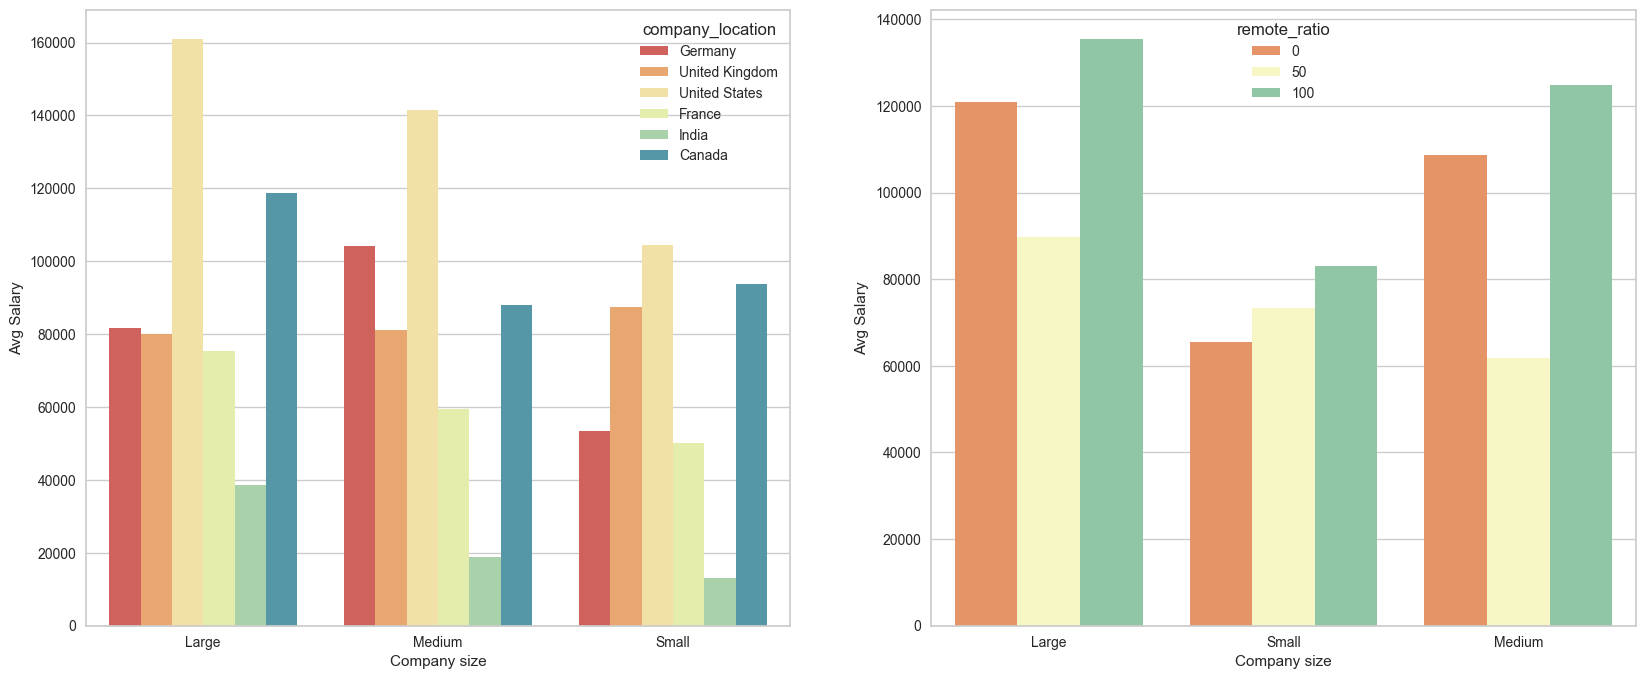

In [95]:
#  the salary in every countery according to company size
topLoc = ['United States','United Kingdom','Canada','Germany','India','France']
df2 = df[df['company_location'].isin(topLoc)]
df2

plt.figure(figsize=(20, 8))
plt.subplot(1, 2,1)
fig1 =sns.barplot(data=df2,x='company_size',y='salary',hue=df2['company_location'],palette='Spectral',ci=None)
fig1.set_xlabel('Company size')
fig1.set_ylabel('Avg Salary')

plt.subplot(1, 2, 2)
#  the avg salary for each remote ratio according to company size
fig2 =sns.barplot(data=df,x='company_size',y='salary',hue='remote_ratio',palette='Spectral',ci=None)
fig2.set_xlabel('Company size')
fig2.set_ylabel('Avg Salary')
fig2;


* the avg salary in the US is the highest regardless of the company size
* the avg salary in US, France and India gets higher by the company size
* the United kingdom have equal avg salarys
* in some country the size of the company dosen't determine the salary  
* Fully remote have the highest avg salary 
* Partially remote have the lowest avg salary in large and Medium

## Top / Lowest Average Salary of DS according company_location

Text(0.5, 1.0, 'Lowest Average Salary of DS according company_location')

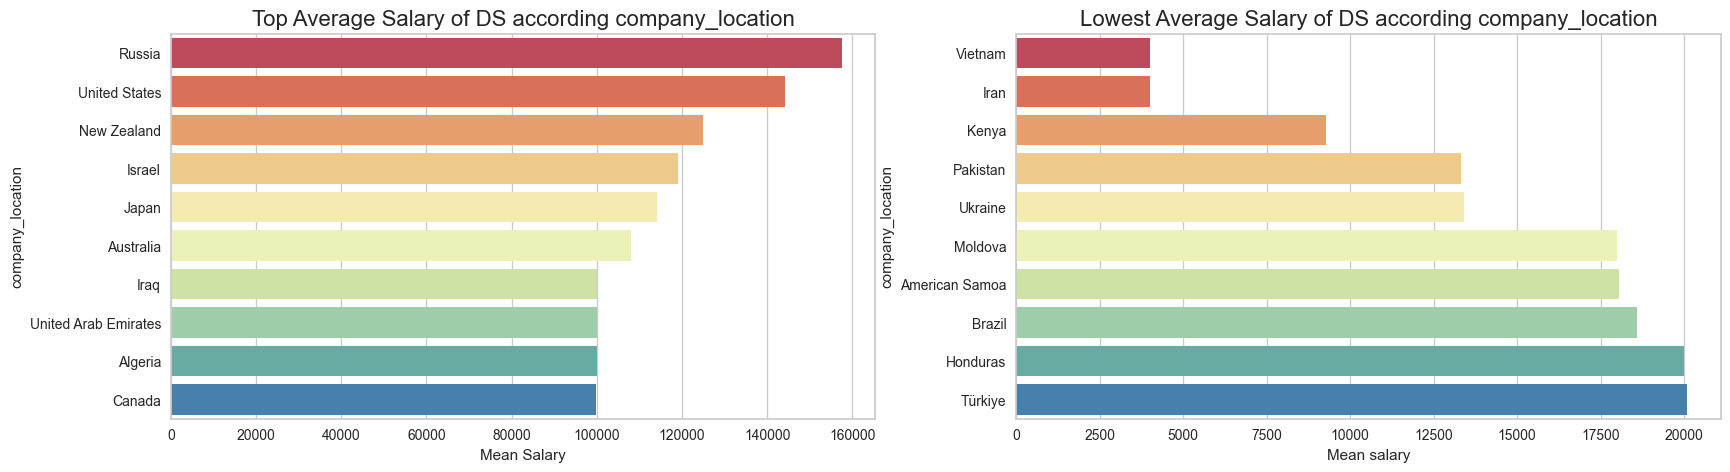

In [96]:
# Top Average Salary of DS according company_location'
top_cmp_locations = df.groupby('company_location')['salary'].mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(20, 5))

# Top Average Salary of DS according company_location'
plt.subplot(1, 2, 1)
ax = sns.barplot(y=top_cmp_locations.index, x=top_cmp_locations,palette='Spectral')
ax.set_xlabel('Mean Salary')
ax.set_title('Top Average Salary of DS according company_location', fontdict={'fontsize': 16})

# Lowest Average Salary of DS according company_location
plt.subplot(1, 2, 2)
top_cmp_locations = df.groupby('company_location')['salary'].mean().sort_values(ascending=True)[:10]
#plt.figure(figsize=(20, 10))
ax = sns.barplot(y=top_cmp_locations.index, x=top_cmp_locations,palette='Spectral')
ax.set_xlabel('Mean salary')
ax.set_title('Lowest Average Salary of DS according company_location', fontdict={'fontsize': 16})

Text(0.5, 1.0, 'Top 10 countries having most DS job opportunities')

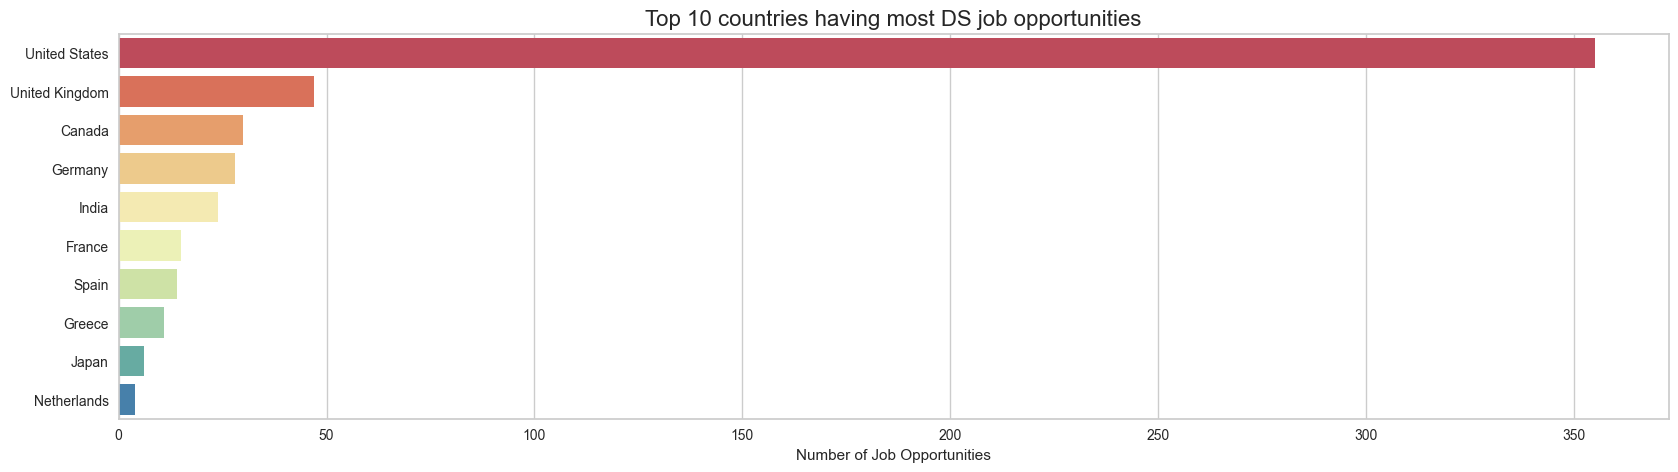

In [97]:
# top 10 company-locations having most job opportunities
top_cl = df['company_location'].value_counts()[:10]
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=top_cl, y=top_cl.index, palette='Spectral')
ax.set_xlabel('Number of Job Opportunities')
ax.set_title('Top 10 countries having most DS job opportunities', fontdict={'fontsize': 16})

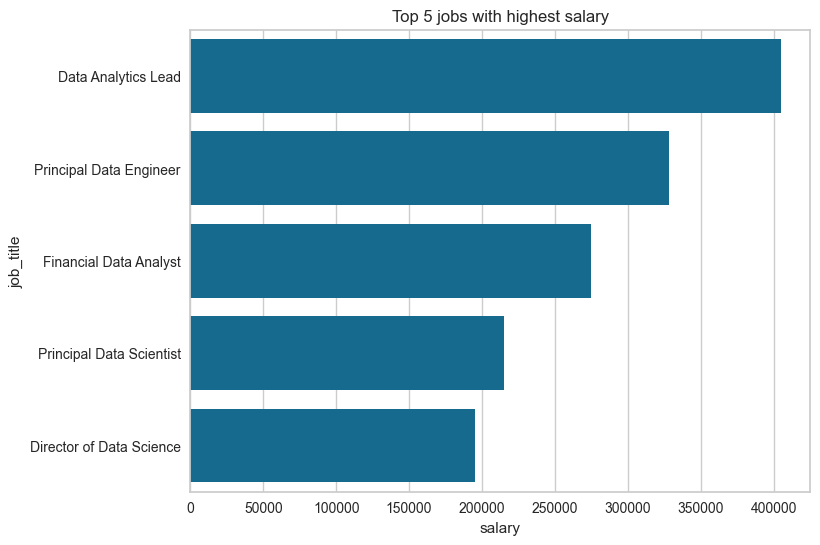

In [98]:
job_avg_salary = df[['job_title','salary']]
job_avg_salary = round(job_avg_salary.groupby(['job_title']).mean()['salary'],2).reset_index()
job_avg_salary= job_avg_salary.sort_values('salary', ascending = False)[:5]
# job_avg_salary
plt.figure(figsize=(8,6))
plt.title('Top 5 jobs with highest salary')
sns.barplot(data=job_avg_salary, x='salary', y='job_title', color= sns.color_palette()[0]);

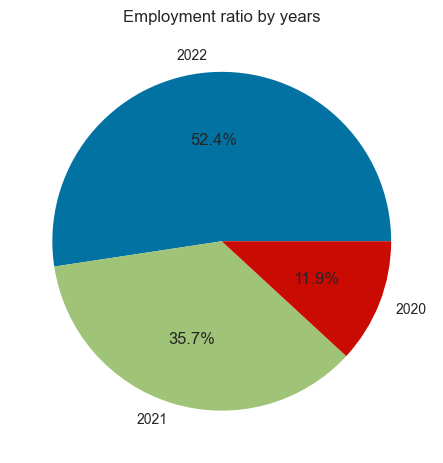

In [99]:
year_ratio = df['work_year'].value_counts().to_list()
years = [2022,2021,2020]
plt.title('Employment ratio by years')
plt.pie(x=year_ratio, labels=years, autopct = '%1.1f%%');

### Linear Regression

In [302]:
# copy for Linear Regression
lr_df = df.copy()
lr_df.head(3)

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size,salary_range
0,2020,Mid,Full-time,Data Scientist,79833,Germany,0,Germany,Large,0
1,2020,Senior,Full-time,Machine Learning Scientist,260000,Japan,0,Japan,Small,1
2,2020,Senior,Full-time,Big Data Engineer,109024,United Kingdom,50,United Kingdom,Medium,0


In [308]:
# label encoded dataframe
le = LabelEncoder()
df_le =  (lr_df.loc[:,lr_df.columns!='salary']).apply(le.fit_transform)

df_le.head(3)

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_range
0,0,2,2,22,17,0,15,0,0
1,0,3,2,41,27,0,25,2,1
2,0,3,2,7,54,1,47,1,0


In [317]:
X = lr_df.drop(['salary_range'],axis=1)
y = lr_df['salary_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

In [318]:
lll = LogisticRegression()
lll.fit(x_train,y_train)

LogisticRegression()

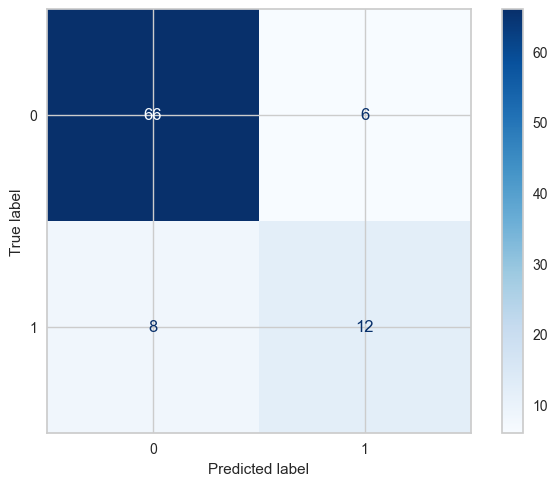

In [319]:
predictions = lll.predict(x_test)
actual_values = np.array(y_test)

# create confusion matrix
con_matrix2 = confusion_matrix(actual_values,predictions)
con_display2 = ConfusionMatrixDisplay(confusion_matrix=con_matrix2)
con_display2.plot(cmap='Blues')
plt.show()

In [253]:
df_le["salary_range"] = df["salary"]
salaries = []
for salary in df_le["salary_range"]:
    if salary <= 150000:
        salaries.append(0)
    else:
        salaries.append(1)
df_le["salary_range"] = salaries

df_le

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_range
0,0,2,2,22,17,0,15,0,0
1,0,3,2,41,27,0,25,2,1
2,0,3,2,7,54,1,47,1,0
3,0,2,2,47,19,0,17,2,0
4,0,3,2,38,55,1,48,0,0
...,...,...,...,...,...,...,...,...,...
602,2,3,2,17,55,2,48,1,1
603,2,3,2,17,55,2,48,1,0
604,2,3,2,12,55,0,48,1,0
605,2,3,2,12,55,2,48,1,0


In [254]:
# here a assigned X for the encoded data, and y to the normailzed data(salary column)
X = df_le.drop(['salary_range'],axis=1)
y = df_le['salary_range']

In [255]:
# test size is only 15%
# random state 800 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=800)
X_train.head(3)

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
131,1,0,2,22,16,1,14,1
583,2,3,2,17,55,2,48,1
57,0,2,2,22,55,2,48,1


In [256]:
y_train.head(3)

131    0
583    1
57     0
Name: salary_range, dtype: int64

Building and Training the Model

In [257]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

Intercept and Coefficinent

In [258]:
print('Intercept: ',lm.intercept_)
coeff = pd.DataFrame(lm.coef_,X.columns, columns=['Coefficinent'])
coeff

Intercept:  -0.3311712044569492


,Coefficinent
work_year,0.049788
experience_level,0.067019
employment_type,-0.014759
job_title,0.006078
employee_residence,0.004247
remote_ratio,0.040027
company_location,0.001344
company_size,-0.050531


compare between predictions and real values with visualization

In [259]:
predictions = lm.predict(X_test)
Real_Values = np.array(y_test)

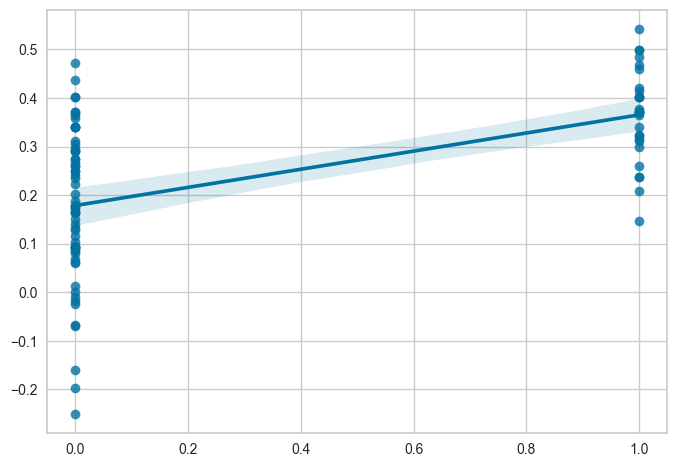

In [260]:
sns.regplot(x=Real_Values,y=predictions);

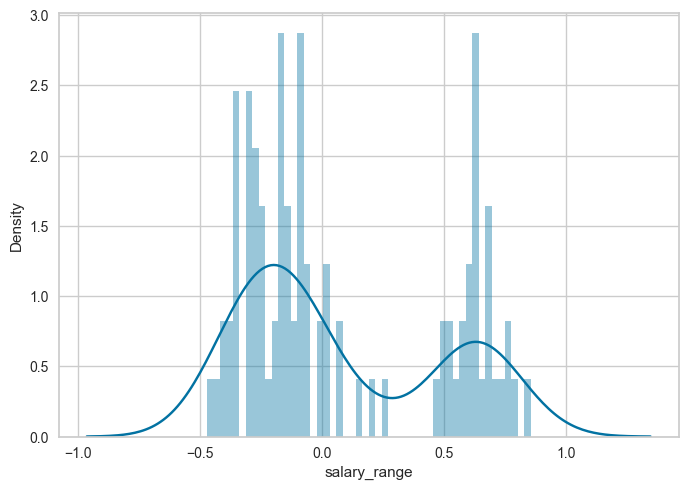

In [261]:
sns.distplot((y_test-predictions),bins=50);

In [262]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3397614376329114
MSE: 0.16773463788669488
RMSE: 0.4095541940777739


In [265]:
lr_accuracy = accuracy_score(y_test,predictions)
lr_accuracy

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [113]:
df["salary_range"] = df["salary"]

In [114]:
salaries = []
for salary in df["salary_range"]:
    if salary <= 150000:
        salaries.append(0)
    else:
        salaries.append(1)
df["salary_range"] = salaries
df

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size,salary_range
0,2020,Mid,Full-time,Data Scientist,79833,Germany,0,Germany,Large,0
1,2020,Senior,Full-time,Machine Learning Scientist,260000,Japan,0,Japan,Small,1
2,2020,Senior,Full-time,Big Data Engineer,109024,United Kingdom,50,United Kingdom,Medium,0
3,2020,Mid,Full-time,Product Data Analyst,20000,Honduras,0,Honduras,Small,0
4,2020,Senior,Full-time,Machine Learning Engineer,150000,United States,50,United States,Large,0
...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,United States,100,United States,Medium,1
603,2022,Senior,Full-time,Data Engineer,126000,United States,100,United States,Medium,0
604,2022,Senior,Full-time,Data Analyst,129000,United States,0,United States,Medium,0
605,2022,Senior,Full-time,Data Analyst,150000,United States,100,United States,Medium,0


In [185]:
df['experience_level'].value_counts()

Senior       280
Mid          213
Entry         88
Executive     26
Name: experience_level, dtype: int64

In [115]:
x = df.iloc[:,[0, 1, 2, 3, 5, 6, 7, 8]].values
x

array([[2020, 'Mid', 'Full-time', ..., 0, 'Germany', 'Large'],
       [2020, 'Senior', 'Full-time', ..., 0, 'Japan', 'Small'],
       [2020, 'Senior', 'Full-time', ..., 50, 'United Kingdom', 'Medium'],
       ...,
       [2022, 'Senior', 'Full-time', ..., 0, 'United States', 'Medium'],
       [2022, 'Senior', 'Full-time', ..., 100, 'United States', 'Medium'],
       [2022, 'Mid', 'Full-time', ..., 100, 'United States', 'Large']],
      dtype=object)

In [116]:
y = df.iloc[:, 9].values
y

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
 9   salary_range        607 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 47.5+ KB


## OneHotEncoder¶



In [269]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
onehotencoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,3,4,6,7])], remainder='passthrough')

In [271]:
x = onehotencoder.fit_transform(x).toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [272]:
x.shape

(607, 170)

In [273]:
x[0]

array([0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e

In [274]:
from sklearn.model_selection import train_test_split



In [275]:
x.shape ,y.shape

((607, 170), (607,))

In [276]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

In [277]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((515, 170), (515,), (92, 170), (92,))

In [278]:
!pip install yellowbrick
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

## Decision Trees

In [279]:
from sklearn.tree import DecisionTreeClassifier

In [280]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(x_train, y_train)

x_train

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.021e+03,
        1.000e+02],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.021e+03,
        1.000e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.022e+03,
        1.000e+02],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.022e+03,
        1.000e+02],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.021e+03,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.022e+03,
        0.000e+00]])

In [281]:
predictions = tree.predict(x_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0], dtype=int64)

In [282]:
y_test

575    0
52     0
530    0
345    1
55     0
      ..
12     0
379    0
229    0
50     0
31     0
Name: salary_range, Length: 92, dtype: int64

In [283]:
dt_accuracy = accuracy_score(y_test, predictions)
dt_accuracy

0.8260869565217391

In [284]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(tree, x_test, y_test,values_format=None,
  #  cmap='Blues');  
plt.show();

In [285]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        72
           1       0.67      0.40      0.50        20

    accuracy                           0.83        92
   macro avg       0.76      0.67      0.70        92
weighted avg       0.81      0.83      0.81        92



## Random Forests

In [286]:
from sklearn.ensemble import RandomForestClassifier

In [287]:
random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0) # 100 and 5 estimators result in the same accuracy
random_forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [288]:
predictions2 = random_forest.predict(x_test)
predictions2

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0], dtype=int64)

In [289]:
y_test

575    0
52     0
530    0
345    1
55     0
      ..
12     0
379    0
229    0
50     0
31     0
Name: salary_range, Length: 92, dtype: int64

In [290]:
rf_accuracy = accuracy_score(y_test, predictions)
rf_accuracy

0.8260869565217391

In [291]:
#plot_confusion_matrix(random_forest, x_test, y_test,values_format=None,
 #   cmap='Blues');  
plt.show();

### Logistic Regression

In [292]:
df

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size,salary_range
0,2020,Mid,Full-time,Data Scientist,79833,Germany,0,Germany,Large,0
1,2020,Senior,Full-time,Machine Learning Scientist,260000,Japan,0,Japan,Small,1
2,2020,Senior,Full-time,Big Data Engineer,109024,United Kingdom,50,United Kingdom,Medium,0
3,2020,Mid,Full-time,Product Data Analyst,20000,Honduras,0,Honduras,Small,0
4,2020,Senior,Full-time,Machine Learning Engineer,150000,United States,50,United States,Large,0
...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,United States,100,United States,Medium,1
603,2022,Senior,Full-time,Data Engineer,126000,United States,100,United States,Medium,0
604,2022,Senior,Full-time,Data Analyst,129000,United States,0,United States,Medium,0
605,2022,Senior,Full-time,Data Analyst,150000,United States,100,United States,Medium,0


In [293]:
# Create X variable and drop columns related to target variable
X = df.drop(['salary_range','salary'],axis=1)

# Use get dummies as one hot encoding method 
X = pd.get_dummies(X)
X

,work_year,remote_ratio,experience_level_Entry,experience_level_Executive,experience_level_Mid,experience_level_Senior,employment_type_Contract,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time,...,company_location_Switzerland,company_location_Türkiye,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_location_Vietnam,company_size_Large,company_size_Medium,company_size_Small
0,2020,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2020,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2020,50,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,2020,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2020,50,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,100,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
603,2022,100,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
604,2022,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
605,2022,100,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [294]:
# Create target variable y
y = df['salary_range']
 #y

In [295]:
# split data into train and test ==> test_size= 30% 
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=23)

In [296]:
logis_model = LogisticRegression()

In [297]:
logis_model.fit(x_train,y_train)

LogisticRegression()

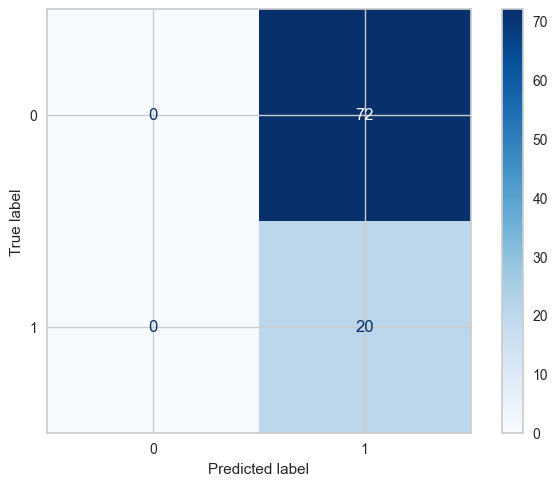

In [321]:
predictions = logis_model.predict(x_test)
actual_values = np.array(y_test)

# create confusion matrix
con_matrix2 = confusion_matrix(actual_values,predictions)
con_display2 = ConfusionMatrixDisplay(confusion_matrix=con_matrix2)
con_display2.plot(cmap='Blues')
plt.show()

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.022e+03,
        1.000e+02],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 2.020e+03,
        5.000e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.022e+03,
        0.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.021e+03,
        1.000e+02],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 2.020e+03,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.020e+03,
        1.000e+02]])

In [299]:
workYear = 2020
expLvl = 'Mid'
empTyp = 'Full-time'
jobTitl = 'Data Scientist'
empRes = 'Germany'
remoteRatio = int('0')
compLoc = 'Germany'
compS = 'Large'

w = [[workYear,expLvl,empTyp,jobTitl,
            empRes,remoteRatio,compLoc,compS]]
            
w

[[2020,
  'Mid',
  'Full-time',
  'Data Scientist',
  'Germany',
  0,
  'Germany',
  'Large']]

In [300]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [301]:
ssss = logis_model.predict(s)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- company_location_Algeria
- company_location_American Samoa
- company_location_Australia
- company_location_Austria
- company_location_Belgium
- ...


In [ ]:
print(classification_report(actual_values,predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       134
           1       0.88      0.45      0.59        49

    accuracy                           0.84       183
   macro avg       0.85      0.71      0.75       183
weighted avg       0.84      0.84      0.82       183



In [320]:
lg_accuracy = accuracy_score(actual_values,predictions)
lg_accuracy

0.8478260869565217

### Compare Between the models

| Model   | Accuracy |
| ----------- | ----------- |
| Linear Regression | r^2 = 0.33  |
| Decision Tree | 0.82 
| Random Forest | 0.82
| Logistic Regression | 0.84

In [ ]:
## Logistic Regression is Highest accuracy